In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('spam.csv',encoding="ISO-8859-1")
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis='columns')
df['spam'],df['text']=df['v1'],df['v2']
df=df.drop(['v1','v2'],axis='columns')
df['spams']=df.spam.replace({'ham':1,'spam':0})
df

,spam,text,spams
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0
5568,ham,Will Ì_ b going to esplanade fr home?,1
5569,ham,"Pity, * was in mood for that. So...any other s...",1
5570,ham,The guy did some bitching but I acted like i'd...,1


In [6]:
df.isnull().sum()

spam     0
text     0
spams    0
dtype: int64

In [7]:
df['spam'].value_counts()

ham     4825
spam     747
Name: spam, dtype: int64

In [8]:
spam=df[df['spam']=='spam']
spam.shape

(747, 3)

In [9]:
ham=df[df['spam']=='ham']
ham=ham.sample(747)
ham

,spam,text,spams
4908,ham,Will do. Have a good day,1
1231,ham,have got * few things to do. may be in * pub l...,1
2392,ham,"Thanks da thangam, i feel very very happy dear...",1
2405,ham,I'm meeting Darren...,1
5513,ham,Yes. Please leave at &lt;#&gt; . So that at ...,1
...,...,...,...
4111,ham,"I'll see, but prolly yeah",1
1441,ham,Ya:)going for restaurant..,1
3304,ham,Ee msg na poortiyagi odalebeku: Hanumanji 7 na...,1
1768,ham,How. Its a little difficult but its a simple w...,1


In [10]:
ham.shape,spam.shape

((747, 3), (747, 3))

In [11]:
spam=ham.append(spam,ignore_index=True)
spam

C:\Users\USER\AppData\Local\Temp\ipykernel_20212\260977309.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spam=ham.append(spam,ignore_index=True)


,spam,text,spams
0,ham,Will do. Have a good day,1
1,ham,have got * few things to do. may be in * pub l...,1
2,ham,"Thanks da thangam, i feel very very happy dear...",1
3,ham,I'm meeting Darren...,1
4,ham,Yes. Please leave at &lt;#&gt; . So that at ...,1
...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,0
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,0
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,0
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,0


In [12]:
spam['spam'].value_counts()
# spam['length']=len(spam['text'])
# spam

ham     747
spam    747
Name: spam, dtype: int64

# data visulation

In [13]:
plt.hist()

TypeError: hist() missing 1 required positional argument: 'x'

# data preparation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer



In [15]:
x_test,x_train,y_test,y_train=train_test_split(spam['text'],spam['spam'],test_size=0.3,shuffle=True)
x_test

656                Po de :-):):-):-):-). No need job aha.
901     FREE for 1st week! No1 Nokia tone 4 ur mob eve...
1260    Oh my god! I've found your number again! I'm s...
266     The sign of maturity is not when we start sayi...
947     Double Mins & Double Txt & 1/2 price Linerenta...
                              ...                        
439          Left dessert. U wan me 2 go suntec look 4 u?
177                              Webpage s not available!
575            Its too late:)but its k.wish you the same.
858     Urgent Ur å£500 guaranteed award is still uncl...
1118    Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...
Name: text, Length: 1045, dtype: object

In [16]:
### bag of words

In [17]:
vec=TfidfVectorizer()
X_train=vec.fit_transform(x_train)
X_train.shape

(449, 2311)

In [18]:
X_test=vec.fit_transform(x_test)
X_test.shape

(1045, 3773)

In [19]:
## pipeline

In [20]:
def my_tokenizer(X):
    newlist = []
    for alist in X:
        newlist.append(alist[0].split(' '))
    return newlist

In [21]:
clf=Pipeline([('tfid',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=500))])
clf.fit(x_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_estimators=500))])

In [22]:
y_pred=clf.predict(x_test)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'spam', 'spam'], dtype=object)

In [23]:
c=confusion_matrix(y_test,y_pred)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       541
        spam       0.99      0.88      0.93       504

    accuracy                           0.94      1045
   macro avg       0.94      0.94      0.94      1045
weighted avg       0.94      0.94      0.94      1045



<AxesSubplot:>

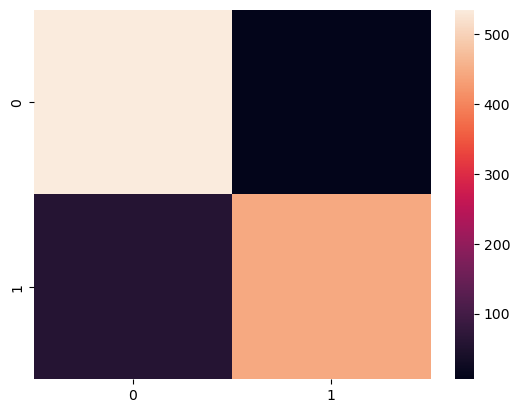

In [25]:
import seaborn as sn
sn.heatmap(c)

In [26]:
accuracy_score(y_test,y_pred)

0.938755980861244

In [27]:
clf.predict(["Ok,nishant fuck off!!"])

array(['ham'], dtype=object)

In [28]:
# SVM

In [29]:
clf=Pipeline([('tfid',TfidfVectorizer()),('clf',SVC(C=100,gamma='auto'))])
clf.fit(x_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', SVC(C=100, gamma='auto'))])

In [30]:
y_pred=clf.predict(x_test)
y_pred

array(['spam', 'spam', 'spam', ..., 'spam', 'spam', 'spam'], dtype=object)

In [31]:
confusion_matrix(y_test,y_pred)

array([[ 22, 519],
       [  0, 504]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       1.00      0.04      0.08       541
        spam       0.49      1.00      0.66       504

    accuracy                           0.50      1045
   macro avg       0.75      0.52      0.37      1045
weighted avg       0.76      0.50      0.36      1045



In [33]:
clf.predict(["Ok,nishant fuck off!!"])

array(['spam'], dtype=object)

In [34]:
accuracy_score(y_test,y_pred)

0.5033492822966508

In [35]:
import joblib

In [36]:
filename = 'finalized_model.sav'
joblib.dump(clf, filename)

['finalized_model.sav']